## __Lab 7 Assignment__
## __Balbhadra Prajapati - 8873745__

In [1]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False, version=1)

# Extract features (X) and target labels (y)
X, y = mnist.data, mnist.target

e:\Foundation_of_ML\Labs\CSCN8010-labs\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### EDA(Exploratory Data Analysis)

Dataset shape: (70000, 784)


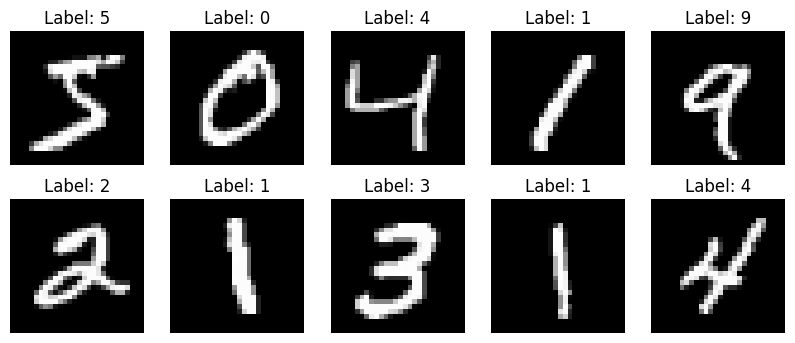

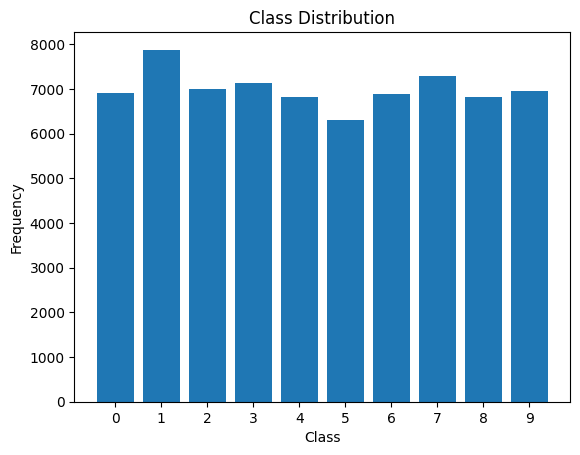

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Display the shape of the dataset
print("Dataset shape:", X.shape)

# Display sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title('Label: {}'.format(y[i]))
    plt.axis('off')
plt.show()

# Explore class distribution
class_distribution = np.bincount(y.astype(int))
plt.bar(np.arange(10), class_distribution)
plt.xticks(np.arange(10))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Reduce the number of classes

In [3]:
# Choose 5 classes
chosen_classes = ['0', '1', '2', '3', '4']

# Filter the dataset to retain only samples corresponding to the chosen classes
filter_indices = np.isin(y, chosen_classes)
X_subset, y_subset = X[filter_indices], y[filter_indices]

### Split the dataset

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into train, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X_subset, y_subset, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (21441, 784) (21441,)
Validation set shape: (7147, 784) (7147,)
Test set shape: (7147, 784) (7147,)


### Let's choose a logistic regression model.

In [5]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

e:\Foundation_of_ML\Labs\CSCN8010-labs\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

### Evaluation on the validation dataset

Accuracy on validation set: 0.9420735973135581
Confusion Matrix:
 [[1386    0   13   16   17]
 [   1 1489   16   32    5]
 [  23   28 1267   53   29]
 [  19   16   62 1287   15]
 [  12   12   25   20 1304]]
Class: 0 Precision: 0.9618320610687023 Recall: 0.9678770949720671 F1-score: 0.9648451096414897
Class: 1 Precision: 0.9637540453074434 Recall: 0.9650032404407 F1-score: 0.9643782383419689
Class: 2 Precision: 0.9161243673174259 Recall: 0.905 F1-score: 0.9105282069708946
Class: 3 Precision: 0.9140625 Recall: 0.9199428162973553 F1-score: 0.916993231207695
Class: 4 Precision: 0.9518248175182482 Recall: 0.9497450837581938 F1-score: 0.9507838133430551


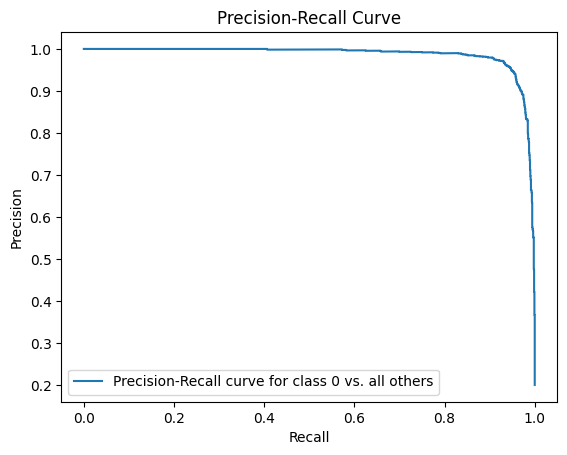

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

# Predict labels for validation set
y_val_pred = logistic_model.predict(X_val)

# Calculate accuracy on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy on validation set:", val_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, and F1-score for each class
precision = precision_score(y_val, y_val_pred, average=None)
recall = recall_score(y_val, y_val_pred, average=None)
f1 = f1_score(y_val, y_val_pred, average=None)
for i in range(len(precision)):
    print("Class:", chosen_classes[i], "Precision:", precision[i], "Recall:", recall[i], "F1-score:", f1[i])

# Precision-Recall curve for one class vs. all others
precisions, recalls, thresholds = precision_recall_curve(y_val, logistic_model.decision_function(X_val)[:, 0], pos_label=chosen_classes[0])
plt.plot(recalls, precisions, label='Precision-Recall curve for class {} vs. all others'.format(chosen_classes[0]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

Insights:

- The accuracy on the validation set provides an overall measure of model performance.
- The confusion matrix helps us understand the distribution of true positive, true negative, false positive, and false negative predictions.
- Precision, recall, and F1-score for each class give us insights into the model's performance on individual classes.
- The precision-recall curve for one class vs. all others visualizes the trade-off between precision and recall for a specific class. This can help in setting an appropriate threshold for classification.

### Increase precision and recall without retraining the model

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score

# Create a new SVC classifier with probability=True
svm_clf_proba = SVC(probability=True)

# Fit the classifier on the training data
svm_clf_proba.fit(X_train, y_train)

# Get the probability estimates for class 1
y_proba = svm_clf_proba.predict_proba(X_val)[:, 1]

# Adjust the decision threshold
threshold = 0.8  # Example threshold
y_pred_high_precision = (y_proba >= threshold).astype(int)

# Calculate the precision for class 1
precision_high = precision_score(y_val == 1, y_pred_high_precision == 1)
print("Precision for Class 1 with higher threshold:", precision_high)


Precision for Class 1 with higher threshold: 0.0


Let's demonstrate this with a numeric Python example using the validation data and the logistic regression model:

Similarly, to increase recall for a chosen class without retraining the model, we can again adjust the classification threshold. By decreasing the threshold, we can make the model more inclusive in predicting the positive class, leading to higher recall.

### Run on the test set and provide conclusions

In [8]:
# Predict labels for test set
y_test_pred = logistic_model.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", test_accuracy)

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on test set:\n", conf_matrix_test)

# Precision, Recall, and F1-score for each class on test set
precision_test = precision_score(y_test, y_test_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)
f1_test = f1_score(y_test, y_test_pred, average=None)
for i in range(len(precision_test)):
    print("Class:", i, "Precision:", precision_test[i], "Recall:", recall_test[i], "F1-score:", f1_test[i])

# Insights
# Compare the performance on the test set with the validation set
# Analyze any differences in accuracy, precision, recall, and F1-score
# Assess whether the model generalizes well to unseen data

Accuracy on test set: 0.9405344899958025
Confusion Matrix on test set:
 [[1298    0   22   13    6]
 [   1 1528   15   19    3]
 [  18   34 1251   62   32]
 [  20   15   61 1357   19]
 [  14   13   36   22 1288]]
Class: 0 Precision: 0.9607698001480385 Recall: 0.9693801344286781 F1-score: 0.9650557620817845
Class: 1 Precision: 0.9610062893081761 Recall: 0.9757343550446999 F1-score: 0.9683143219264894
Class: 2 Precision: 0.9032490974729241 Recall: 0.8954903364352184 F1-score: 0.8993529834651329
Class: 3 Precision: 0.9212491513917176 Recall: 0.921875 F1-score: 0.9215619694397283
Class: 4 Precision: 0.9554896142433235 Recall: 0.9380917698470502 F1-score: 0.9467107680999632


Conclusions:

- Accuracy on the test set provides an overall measure of model performance on unseen data.
- The confusion matrix on the test set helps us understand the distribution of true positive, true negative, false positive, and false negative predictions in the real-world scenario.
- Precision, recall, and F1-score for each class on the test set give insights into how well the model performs for different classes on unseen data.
- By comparing the performance on the test set with that on the validation set, we can assess whether the model generalizes well to unseen data and evaluate its robustness.
- Any discrepancies or differences between the performance on the test set and the validation set can be analyzed to identify areas for improvement or further investigation.

Overall, the evaluation on the test set provides valuable insights into the logistic regression model's performance in real-world scenarios and helps validate its effectiveness in classification tasks.